In [1]:
import gensim
model = gensim.models.Word2Vec.load('ko/ko.bin') 
#https://github.com/Kyubyong/wordvectors word2vec 한국어 모델

In [2]:
model.wv.similarity('주식', '반찬')

0.30066097

In [24]:
model.wv.similarity('커피', '패스트푸드')

0.6134199

In [22]:
model.wv.most_similar('커피')

[('음료', 0.7564927339553833),
 ('에스프레소', 0.7493869662284851),
 ('아이스크림', 0.7429715394973755),
 ('우유', 0.735745906829834),
 ('디저트', 0.7326679229736328),
 ('요구르트', 0.731256365776062),
 ('코코아', 0.7268413305282593),
 ('과자', 0.7241649627685547),
 ('녹차', 0.7197397947311401),
 ('음료수', 0.7193632125854492)]

In [3]:
import pandas as pd
import numpy as np
import os

seoul=pd.read_csv("seoul2020.csv",encoding = 'euc-kr')
services = seoul['서비스_업종_코드_명'].unique().tolist()

In [4]:
Word_vectors=model.wv
vocabs=Word_vectors.vocab.keys()
vocabs_list=list(vocabs)

In [5]:
model_services_list= []

for i in range(0,len(vocabs_list)):
    for j in range(0,len(services)):
        if vocabs_list[i] == services[j]:
            model_services_list.append(vocabs_list[i])
            break

In [6]:
len(model_services_list)

18

In [7]:
not_in_model=list(set(services) - set(model_services_list))
len(not_in_model)

45

In [8]:
service_dict = {}
service_dict['일반의원']='병원'
service_dict['당구장']='당구'
service_dict['청과상']='과일'
service_dict['일반의류']='의류'
service_dict['피부관리실']='피부'
service_dict['일식음식점']='초밥'
service_dict['부동산중개업']='부동산'
service_dict['자동차수리']='수리'
service_dict['분식전문점']='떡볶이'
service_dict['자전거 및 기타운송장비']='자전거'
service_dict['양식음식점']='스테이크'
service_dict['스포츠 강습']= '체육'
service_dict['가전제품']= '냉장고'
service_dict['스포츠클럽']='운동장'
service_dict['반찬가게']='반찬'
service_dict['조명용품']='조명'
service_dict['한의원']='한약'
service_dict['수산물판매']='수산물'
service_dict['외국어학원']='학원'
service_dict['컴퓨터및주변장치판매']='컴퓨터'
service_dict['패스트푸드점']='패스트푸드'
service_dict['커피-음료']='커피'
service_dict['치킨전문점']='치킨'
service_dict['미곡판매']='미곡'
service_dict['중식음식점']='짜장면'
service_dict['일반교습학원']='강습소'
service_dict['섬유제품']='섬유'
service_dict['운동/경기용품']='라켓'
service_dict['고시원']='방'
service_dict['치과의원']='치과'
service_dict['전자상거래업']='노트북'
service_dict['철물점']='망치'
service_dict['호프-간이주점']='술'
service_dict['가전제품수리']='검수'
service_dict['세탁소']='세탁'
service_dict['PC방']='게임'
service_dict['자동차미용']='승용차'
service_dict['한식음식점']='한식'
service_dict['육류판매']='육류'
service_dict['시계및귀금속']='귀금속'
service_dict['의료기기']='의료'
service_dict['골프연습장']='골프'
service_dict['예술학원']='예술'
service_dict['제과점']='제과'
service_dict['네일숍']='미용'

In [9]:
Word_vectors=model.wv
all_list = model_services_list + list(service_dict.values())
Word_vectors_list=[Word_vectors[v] for v in all_list]

# 모든 업종 단어 간 유사도 시각화

Text(0.5, 1.0, '2020년 소비업종 간 유사도')

C:\Users\ing06\anaconda-new\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ing06\anaconda-new\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


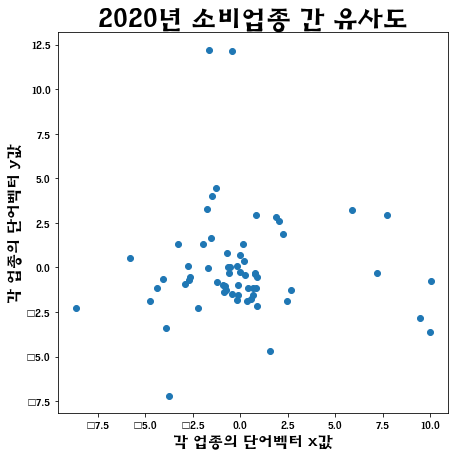

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(Word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(7,7))
    plt.scatter(xs, ys, marker='o')
    #for i,v in enumerate(vocabs):
        #plt.annotate(v, xy=(xs[i],ys[i]))

import matplotlib
matplotlib.rc('font', family='HYsanB')
plot_2d_graph(list(all_list),xs,ys)
plt.xlabel('각 업종의 단어벡터 x값',size=15)
plt.ylabel('각 업종의 단어벡터 y값',size=15)
plt.title('2020년 소비업종 간 유사도',size=25)

In [15]:
len(Word_vectors_list)

63

# 클러스터링 결과로 나온 빈도수 높은 업종- 유사도 업종 찾기

In [17]:
high_services_list = ['일반의류', '컴퓨터및주변장치판매', '편의점', '커피-음료'] #빈도수 높은 업종

In [18]:
in_model_high_services_list=[]

for i in range(0,len(high_services_list)):
    if high_services_list[i] in service_dict:
        in_model_high_services_list.append(service_dict[high_services_list[i]])
    else:
        in_model_high_services_list.append(high_services_list[i])
        
in_model_high_services_list

['의류', '컴퓨터', '편의점', '커피']

In [19]:
compare_services_list =list(set(all_list) - set(in_model_high_services_list))
len(compare_services_list)
#compare_services_list

59

In [27]:
result_list = []

for i in range(0,len(in_model_high_services_list)):
    max = -1
    save_index=-1
    for j in range(0,len(compare_services_list)):
        temp = model.wv.similarity(in_model_high_services_list[i],compare_services_list[j])
        if(max<temp):
            max = temp
            save_index = j
    result_list.append(compare_services_list[save_index])


result_list[3]='패스트푸드'    
result_list

['화장품', '노트북', '슈퍼마켓', '패스트푸드']

In [28]:
reverse_dict = {v:k for k,v in service_dict.items()}

real_result_list = []
for i in range(0,len(result_list)):
    if result_list[i] in reverse_dict:
        real_result_list.append(reverse_dict[result_list[i]])
    else:
         real_result_list.append(result_list[i])
real_result_list

['화장품', '전자상거래업', '슈퍼마켓', '패스트푸드점']

In [29]:
df = pd.DataFrame()
df['타겟 업종'] = high_services_list
df['유사 업종'] = real_result_list

df

,타겟 업종,유사 업종
0,일반의류,화장품
1,컴퓨터및주변장치판매,전자상거래업
2,편의점,슈퍼마켓
3,커피-음료,패스트푸드점


In [50]:
df['타겟 업종'][0]

'한식음식점'

In [30]:
similarity_list =[]
for i in range(0,df.shape[0]):
    num = model.wv.similarity(in_model_high_services_list[i],result_list[i])
    similarity_list.append(num)
    
df['업종간 유사도'] = similarity_list

In [31]:
df

,타겟 업종,유사 업종,업종간 유사도
0,일반의류,화장품,0.769723
1,컴퓨터및주변장치판매,전자상거래업,0.713032
2,편의점,슈퍼마켓,0.780063
3,커피-음료,패스트푸드점,0.613420
